# Module 3: Feature extraction - Practice

In this session you will practice feature extraction with **Principal Componentent Analysis**
and **Factor Analysis**.

We are going to use **titanic** dataset.

sklearn API reference:

+ [sklearn.decomposition.PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)
+ [sklearn.decomposition.FactorAnalysis](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.FactorAnalysis.html)

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import os, sys
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.decomposition import FactorAnalysis
from sklearn.preprocessing import scale

from scipy.stats import pearsonr

np.random.seed(18937)

## Load dataset

In [2]:
# Dataset location
DATASET = '/dsa/data/all_datasets/titanic_ML/titanic.csv'
assert os.path.exists(DATASET)

# Load and shuffle
dataset = pd.read_csv(DATASET).sample(frac = 1).reset_index(drop=True)
dataset.describe()

,pclass,sex,age,sibsp,parch,fare,embarked,survived
count,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000
mean,2.312360,0.642697,29.548697,0.503371,0.351685,32.865772,0.895506,0.389888
std,0.837241,0.479475,13.379025,1.095286,0.790069,52.639685,0.529535,0.487999
min,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,1.000000,0.000000
50%,3.000000,1.000000,28.000000,0.000000,0.000000,13.775000,1.000000,0.000000
75%,3.000000,1.000000,37.000000,1.000000,0.000000,29.925000,1.000000,1.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,2.000000,1.000000


Create variable **X** and **y** and pull features and labels respectively.

In [3]:
# Complete code below this comment (Question #P101)
# ----------------------------------
X = np.array(dataset.iloc[:,:-1])
y = np.array(dataset.survived)

**Initialize** and **fit** both a PCA and a FactorAnalysis feature extractors <span style="background: yellow">with 5 components</span>.

In [4]:
# Complete your code below this comment for PCA (Question #P102)
# ----------------------------------
pca = PCA(n_components=5)
pca.fit(X)

# Complete your code below this comment for FA (Question #P103)
# ----------------------------------
fa = FactorAnalysis(n_components=5)
fa.fit(X)

FactorAnalysis(n_components=5)

## Print explained variance ratio for each extracted feature

In [6]:
# Complete code below this comment for PCA (Question #P104)
# ----------------------------------
print('PCA', pca.explained_variance_ratio_)

PCA [9.40387759e-01 5.87406060e-02 4.21984854e-04 1.56438754e-04
 1.46031870e-04]


In [7]:
# Complete code below this comment for FA (Question #P105)
# ----------------------------------
def FA_explained_variance_ratio(fa):
    fa.explained_variance_ = np.flip(np.sort(np.sum(fa.components_**2, axis=1)), axis=0)
    total_variance = np.sum(fa.explained_variance_) + np.sum(fa.noise_variance_)
    fa.explained_variance_ratio_ = fa.explained_variance_ / total_variance

FA_explained_variance_ratio(fa)
print('FA', fa.explained_variance_ratio_)

FA [9.40048739e-01 5.84015698e-02 1.99209172e-04 5.59455086e-05
 2.96715012e-05]


## Compute correlation coefficient for extracted features

1) Use [scipy.stats.pearsonr()](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html)

In [8]:
# Complete code below this comment for PCA (Question #P106)
# ----------------------------------
X_PCA = pca.transform(X)
print([pearsonr(X_PCA[:,i], y)[0] for i in range(X_PCA.shape[1])])

# Add code below this comment for FA(Question #P107)
# ----------------------------------

X_FA = fa.transform(X)
print([pearsonr(X_FA[:,i], y)[0] for i in range(X_FA.shape[1])])



[0.24872661824798253, -0.10055176038014843, -0.0944015524947392, -0.12274122279028819, 0.25317711133523246]
[0.24883090257945611, -0.10041907651985686, -0.011046190976882097, -0.24840054259671351, -0.468947642404959]


2) We encourage you to attempt the same using the following equation, where j is index for features.

$$ r_j = \frac{\sigma_{X_j y}}{\sigma_{X_j} \sigma_y} = \frac{(y-\bar y)^T (X_j-\bar {X_j})}{\lVert X_j-\bar {X_j}\rVert \cdot \lVert y-\bar y\rVert} = cos \measuredangle(X_j-\bar {X_j}, y-\bar y) $$

**Tip**: _You could refer to labs for hints or make use of an implementation of the equation provided with **cosine(a,b)**._

$(X-\bar X)$ and $(y-\bar y)$ are given as **X_centered** and **y_centered** respectively.

In [10]:
X_centered = scale(X_PCA, with_std = False)
y_centered = scale(y.astype(float), with_std = False)

# This is a function to compute cosine of the angle between two vectors.
cosine = lambda a,b: np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))

# Add code below this comment for PCA only; (Question #P108)
# goal is to get close results to what previous cell did for PCA.
# ----------------------------------

print([cosine(X_centered[:,j], y_centered) for j in range(X_PCA.shape[1])])



[0.24872661824798264, -0.10055176038014844, -0.09440155249473922, -0.12274122279028817, 0.25317711133523246]


## Scree plot

Create a scree plot for PCA's explained variance ratio below.

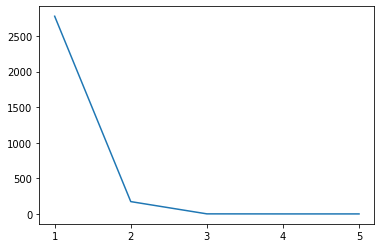

In [11]:
x_ticks = np.arange(len(pca.components_))+1
plt.xticks(x_ticks) # this enforces integers on the x-axis

# Complete code below this comment for PCA (Question #P109)
# ----------------------------------
plt.plot(x_ticks, pca.explained_variance_)

Create a scree plot for FA's explained variance ratio below.

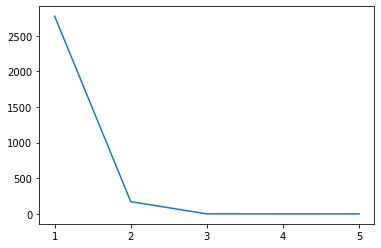

In [12]:
x_ticks = np.arange(len(fa.components_))+1
plt.xticks(x_ticks) # this enforces integers on the x-axis

# Complete code below this comment for FA (Question #P110)
# ----------------------------------
plt.plot(x_ticks, fa.explained_variance_)

Plot both in the same figure below <span style="background: yellow;">in log-scale</span>.

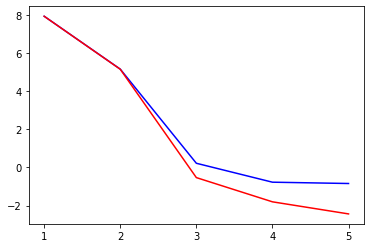

In [13]:
# Complete code below this comment for FA (Question #P111)
# ----------------------------------
x_ticks = np.arange(len(pca.components_))+1
plt.xticks(x_ticks) # this enforces integers on the x-axis
plt.plot(x_ticks, np.log(pca.explained_variance_), 'b')
plt.plot(x_ticks, np.log(fa.explained_variance_), 'r')
plt.show()

Which do you think performed better for this dataset? PCA or FA? What makes you think so?

# Save your notebook!  Then `File > Close and Halt`